In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

SEED = 666

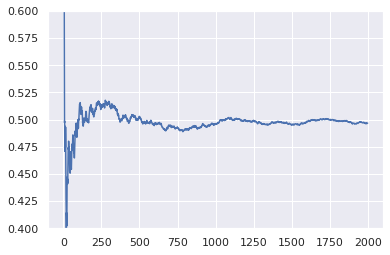

In [2]:
# S1
from spellbook import uniform_0_1, run_simple_simulation
np.random.seed(SEED)

def h(x):
    return x

M = 2000

estimated_values, _ = run_simple_simulation(h, uniform_0_1, uniform_0_1, M)
plt.plot(estimated_values)
plt.ylim(0.4, 0.6)
plt.show()

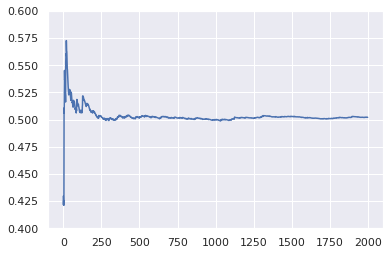

In [3]:
# S2
from spellbook import Distribution, g_polynomial
np.random.seed(SEED)

M = 2000

estimated_values, _ = run_simple_simulation(h, g_polynomial, uniform_0_1, M)
plt.plot(estimated_values)
plt.ylim(0.4, 0.6)
plt.show()

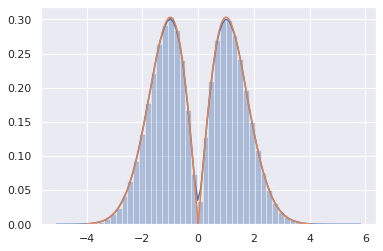

In [4]:
# S3 sampling from g_tilde
from spellbook import g_tilde
np.random.seed(SEED)

x = np.linspace(-4, 4, 10000)
sns.distplot(g_tilde.sample(1000000))
plt.plot(x, g_tilde.pdf(x))
plt.show()

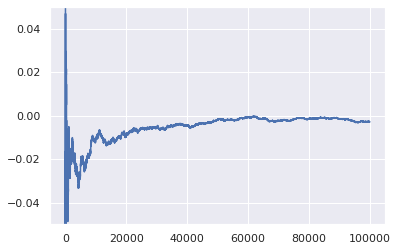

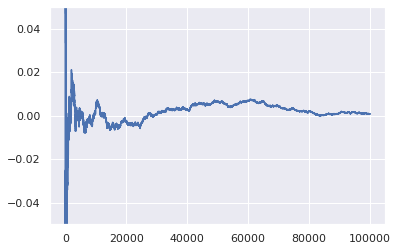

In [5]:
# S3 g_tilde simulation
from spellbook import normal_standard
np.random.seed(SEED)

M = 100000

estimated_values_g_tilde, estimated_tilde  = run_simple_simulation(h, g_tilde, normal_standard, M)
plt.plot(estimated_values_g_tilde)
plt.ylim(-0.05, 0.05)
plt.show()

# S3 normal_standard simulation

M = 100000

estimated_values_normal_standard, estimated_normal = run_simple_simulation(h, normal_standard, normal_standard, M)
plt.plot(estimated_values_normal_standard)
plt.ylim(-0.05, 0.05)
plt.show()

In [6]:
# S3 check inequality
np.random.seed(SEED)

est_tilde = []
est_norm = []

M = 100

for i in range(10000):
    est_tilde.append(run_simple_simulation(h, g_tilde, normal_standard, M)[0][-1]*M**0.5)
    est_norm.append(run_simple_simulation(h, normal_standard, normal_standard, M)[0][-1]*M**0.5)

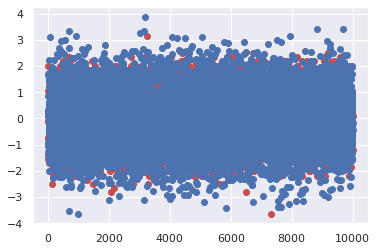

In [7]:
plt.plot(est_tilde, "ro")
plt.plot(est_norm, "bo")

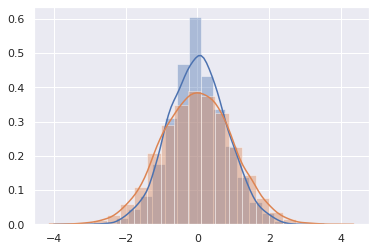

In [8]:
sns.distplot(est_tilde, bins=20)
sns.distplot(est_norm, bins=20)
plt.show()

In [9]:
print(np.array(est_tilde).var(), np.array(est_norm).var())

0.6473688119286807 1.0003134790472354


In [10]:
print(estimated_normal.var(), estimated_tilde.var())

0.9961142087693273 0.6366377865777144


In [11]:
# S4
from spellbook import laplace, AdaptiveSampling
np.random.seed(SEED)

advs = AdaptiveSampling(h, [normal_standard, g_tilde, laplace], normal_standard)
history = advs.fit()

Algorithm converged on iteration 77


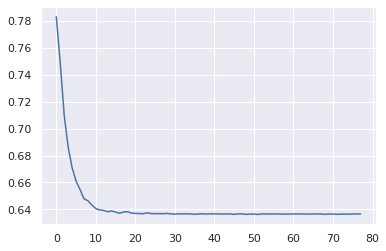

In [12]:
plt.plot(history["variance_log"])

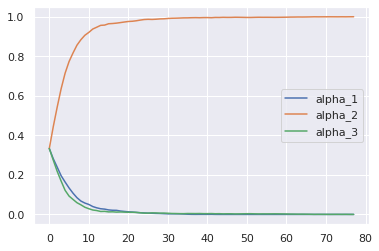

In [13]:
plt.plot(np.vstack(history["alphas_log"])[:, 0], label="alpha_1")
plt.plot(np.vstack(history["alphas_log"])[:, 1], label="alpha_2")
plt.plot(np.vstack(history["alphas_log"])[:, 2], label="alpha_3")
plt.legend()
plt.show()

In [14]:
# S5
from spellbook import g_hyperbolic
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(tolerance=1e-4)

Algorithm converged on iteration 121


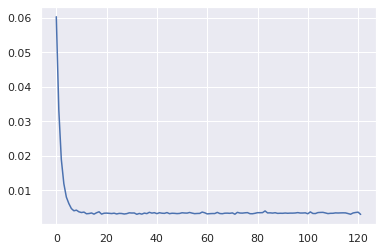

In [15]:
plt.plot(history["variance_log"])

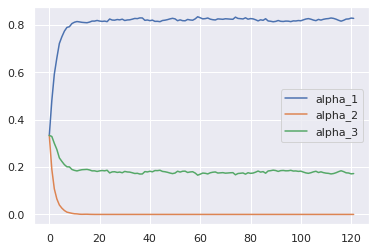

In [16]:
plt.plot(np.vstack(history["alphas_log"])[:, 0], label="alpha_1")
plt.plot(np.vstack(history["alphas_log"])[:, 1], label="alpha_2")
plt.plot(np.vstack(history["alphas_log"])[:, 2], label="alpha_3")
plt.legend()
plt.show()

In [17]:
advs.alphas

array([0.82743351, 0.        , 0.17256649])

In [18]:
# S6
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(max_iter=20, debug=True)

Maximal iteration (20) is reached


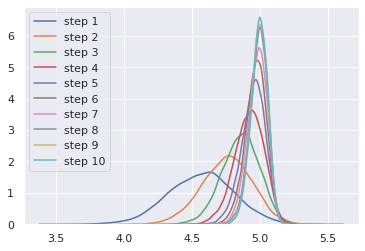

In [19]:
for i in range(10):
    sns.distplot(history["global_estimation_log"][i], label=f"step {i+1}", hist=False)
plt.legend()
plt.show()

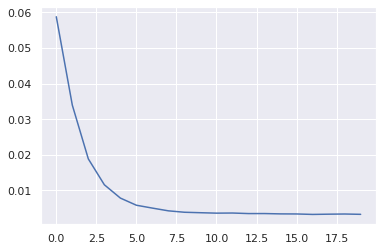

In [20]:
plt.plot([history["global_estimation_log"][i].var() for i in range(20)])